# Nuit des bibliothèques 2022 : entrées et prêts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import datetime

from kiblib.utils.db import DbConn

In [2]:
samedis_str = ['2022-09-10',
               '2022-09-17',
               '2022-09-24',
               '2022-10-01',
               '2022-10-08',
               '2022-10-15']

In [3]:
samedis = [datetime.date.fromisoformat(s_str) for s_str in samedis_str]

In [4]:
db_conn = DbConn().create_engine()

## Entrées

In [5]:
query = """
SELECT datetime as date_heure, entrees as nombre
FROM stat_entrees
WHERE YEAR(datetime) >= 2022
"""
df = pd.read_sql(query, db_conn)

In [6]:
df['date_heure'] = pd.to_datetime(df['date_heure'])
df['date'] = df['date_heure'].dt.date
df['semaine'] = df['date_heure'].dt.year.astype(str) + "-" + df['date_heure'].dt.isocalendar().week.astype(str)
df['semaine_simple'] = df['date_heure'].dt.isocalendar().week.astype(str)
df['jour_semaine'] = df['date_heure'].dt.weekday
df['heure'] = df['date_heure'].dt.hour
#if (df['date'].isin(['2022-10-15'])):
#    df = df[(df['heure'] >= 9) & (df['heure'] < 22)]
#df = df[(df['heure'] >= 9) & (df['heure'] < 22) & (df['date'] == datetime.date(2022, 10, 15))]
df = df[~((df['jour_semaine'] == 6) & (df['heure'] < 14))]
df = df[~((df['jour_semaine'] == 6) & (df['heure'] > 17))]

df_samedi = df[df['date'].isin(samedis)]

In [7]:
df_samedi_date_heure = df_samedi.groupby(['date', 'heure'])['nombre'].sum().to_frame().reset_index()
df_samedi_date = df_samedi.groupby(['date'])['nombre'].sum().to_frame().reset_index()

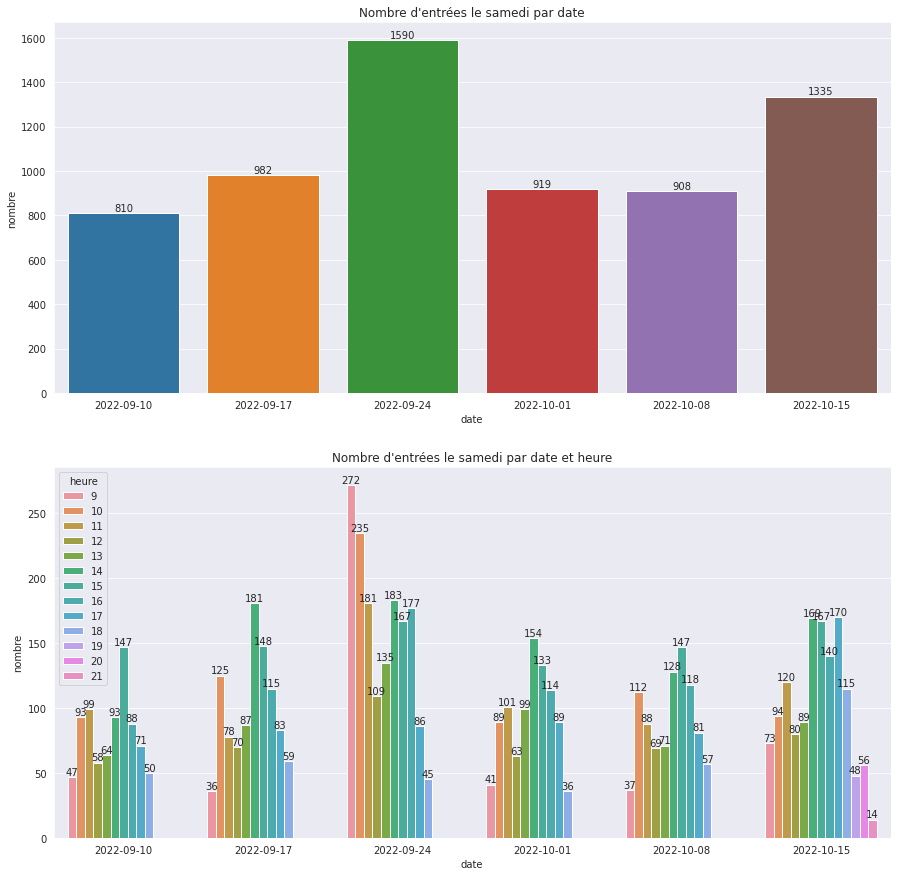

In [8]:
f, ax = plt.subplots(2, figsize=(15, 15))
sns.barplot(data=df_samedi_date, x= 'date', y='nombre', ax=ax[0])
for i in ax[0].containers:
    ax[0].bar_label(i,)
ax[0].set_title("Nombre d'entrées le samedi par date")
sns.barplot(data=df_samedi_date_heure, x= 'date', y='nombre', hue='heure', ax=ax[1])
for i in ax[1].containers:
    ax[1].bar_label(i,)
ax[1].set_title("Nombre d'entrées le samedi par date et heure")
f.show()

## Prêts

In [9]:
query = """
SELECT issuedate as date_heure, borrowernumber as usager
FROM stat_issues
WHERE DATE(issuedate) >= '2022-09-01' AND location NOT IN ('MED0A', 'BUS1A')
"""
df = pd.read_sql(query, db_conn)

In [10]:
df['nombre'] = 1
df['date_heure'] = pd.to_datetime(df['date_heure'])
df['date'] = df['date_heure'].dt.date
df['semaine'] = df['date_heure'].dt.year.astype(str) + "-" + df['date_heure'].dt.isocalendar().week.astype(str)
df['semaine_simple'] = df['date_heure'].dt.isocalendar().week.astype(str)
df['jour_semaine'] = df['date_heure'].dt.weekday
df['heure'] = df['date_heure'].dt.hour
#if (df['date'].isin(['2022-10-15'])):
#    df = df[(df['heure'] >= 9) & (df['heure'] < 22)]
#df = df[(df['heure'] >= 9) & (df['heure'] < 22) & (df['date'] == datetime.date(2022, 10, 15))]
df = df[~((df['jour_semaine'] == 6) & (df['heure'] < 14))]
df = df[~((df['jour_semaine'] == 6) & (df['heure'] > 17))]

df_samedi = df[df['date'].isin(samedis)]


In [11]:
df_samedi_date_heure = df_samedi.groupby(['date', 'heure'])['nombre'].sum().to_frame().reset_index()
df_samedi_date = df_samedi.groupby(['date'])['nombre'].sum().to_frame().reset_index()

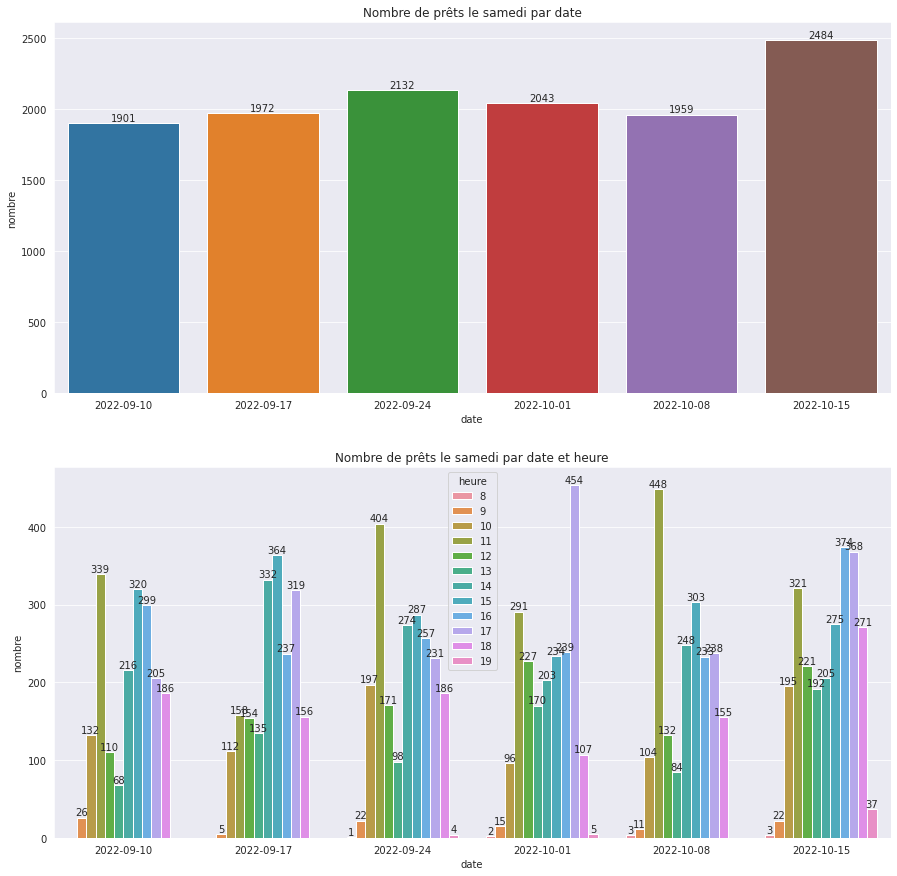

In [12]:
f, ax = plt.subplots(2, figsize=(15, 15))
sns.barplot(data=df_samedi_date, x= 'date', y='nombre', ax=ax[0])
ax[0].set_title("Nombre de prêts le samedi par date")
for i in ax[0].containers:
    ax[0].bar_label(i,)
sns.barplot(data=df_samedi_date_heure, x= 'date', y='nombre', hue='heure', ax=ax[1])
ax[1].set_title("Nombre de prêts le samedi par date et heure")
for i in ax[1].containers:
    ax[1].bar_label(i,)
f.show()